In [ ]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../modules/'))
sys.path.insert(1, os.path.join(sys.path[0], '../data_creation/'))
sys.path.insert(1, os.path.join(sys.path[0], '../networks/'))
sys.path.insert(1, os.path.join(sys.path[0], '../network_trainers/'))

Overview of the different networks (and their trainers) in this directory
***

# Filename scheme

CNN: Convolutional Neural Network.
 - based on a series of convolutional layers
 
\_C: Classifier.
 - classify sample as one of many labels.

\_R: Regression. 
 - determine scalar value for each sample

\_BC: Binary Classifier.
 - classify samples as one of two labels.

\_BN: Batch Normalized.
 - All (most?) activations are batch normalized.
 
\_QP: Quad Path.
 - Convolutional layers are made with `Quad_Path_Layers()`

\_DS: Downsampling.
 - Convolutions are followed by stride=2 downsampling convolution.
 
\_DSFC: Downsampling -> Fully Connected.
 - Downsampling convolution chain followed by chain of fully conected layers.

***

## Network/Trainers/Data Creators Groupings
 - Which networks go with which trainer/ data creator combinations

### Classification Networks:

#### Classifier

Network: `CNN_DS_BN_C.py`<br>
Trainer: `CNN_C_Trainer.py`<br>
Creator: `Data_Creator_C.py`<br>

> For classification of cable delay as being in one of many groups.
>
> Data_Creator_C provides input samples and assigns a label of depending on the absolute value of the desired precision.
 - The continous spectrum of delays is broken into chunks based on some input precision. Curently allowed precisions : 0.005, 0.001, 0.0005, 0.00025.

#### Binary Classifier

Network: `CNN_DS_BN_BC.py`<br>
Trainer: `CNN_BC_Trainer.py`<br>
Creator: `Data_Creator_BC.py`<br>

> For classification of cable delay as having either a positive slope or a negative slope. 
>
> Data_Creator_BC provides input samples and assigns a label of `[1,0]` for a positive slope, and `[0,1]` for a negative slope.

> Concept was to use Binary Classifer to determine the sign of the delay, then classifier to determine its magnitude.

### Regression Networks:

#### Downsampling

Network: `CNN_DS_BN_R.py`<br>
Trainer: `CNN_DS_BN_R_Trainer.py`<br>
Creator: `Data_Creator_R.py`<br>

> For finding the value of cable delay
>
> Data_Creator_R provides the input samples and the target delay. 

#### Downsampling -> Fully Connected

Network: `CNN_DSFC_BN_R.py`<br>
Trainer: `CNN_DS_BN_R_Trainer.py`<br>
Creator: `Data_Creator_R.py`<br>

> For finding the value of cable delay
>
> Data_Creator_R provides the input samples and the target delay. 

#### Quad Path

Network: `CNN_QP_BN_R.py`<br>
Trainer: `CNN_R_Trainer.py`<br>
Creator: `Data_Creator_R.py`<br>

> For finding the value of cable delay
>
> Data_Creator_R provides the input samples and the target delay. 

***
## Differences?

`Data_Creator_R.py` vs `Data_Creator_BC.py` vs vs `Data_Creator_C.py`

 - R provides scalar targets
 - BC provides binary labels
 - C provides labels depending on the precision desired

`CNN_DS_BN_R_Trainer` vs `CNN_R_Trainer.py`

 - Different keep probability variables

`CNN*R_Trainer.py` vs `CNN_BC_Trainer.py` vs `CNN_C_Trainer.py`

 - Different input shapes for targets/labels
 - Different metrics being tracked

*** 
## Network layer output dimensions

### CNN_DS_BN_C

In [1]:
from CNN_DS_BN_C import CNN_DS_BN_C

In [3]:
CNN_DS_BN_C_example = CNN_DS_BN_C(name = 'CNN_DS_BN_C_example',
                                  num_downsamples = 2,
                                  num_classes = 161,
                                  log_dir = 'examples/')
CNN_DS_BN_C_example.print_params()
CNN_DS_BN_C_example.create_graph()
CNN_DS_BN_C_example._layers

{'adam_initial_learning_rate': 0.0001,
 'log_dir': 'examples/',
 'name': 'CNN_DS_BN_C_example',
 'num_classes': 161,
 'num_downsamples': 2}
creating network graph .... ...... done

[<tf.Tensor 'conv_layer_0/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 512, 4) dtype=float32>,
 <tf.Tensor 'conv_layer_1/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 256, 16) dtype=float32>]

### CNN_DS_BN_BC

In [1]:
from CNN_DS_BN_BC import CNN_DS_BN_BC

In [13]:
CNN_DS_BN_BC_example = CNN_DS_BN_BC(name = 'CNN_DS_BN_BC_example',
                                    num_downsamples = 4,
                                    log_dir = 'examples/')
CNN_DS_BN_BC_example.print_params()
CNN_DS_BN_BC_example.create_graph()
CNN_DS_BN_BC_example._layers

{'adam_initial_learning_rate': 0.0001,
 'log_dir': 'examples/',
 'name': 'CNN_DS_BN_BC_example',
 'num_downsamples': 4}
creating network graph ...... ...... done

[<tf.Tensor 'conv_layer_0/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 512, 2) dtype=float32>,
 <tf.Tensor 'conv_layer_1/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 256, 4) dtype=float32>,
 <tf.Tensor 'conv_layer_2/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 128, 8) dtype=float32>,
 <tf.Tensor 'conv_layer_3/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 64, 16) dtype=float32>]

### CNN_DS_BN_R

In [14]:
from CNN_DS_BN_R import CNN_DS_BN_R

In [15]:
CNN_DS_BN_R_example = CNN_DS_BN_R(name = 'CNN_DS_BN_R_example',
                                  num_downsamples = 4,
                                  log_dir = 'examples/')
CNN_DS_BN_R_example.print_params()
CNN_DS_BN_R_example.create_graph()
CNN_DS_BN_R_example._layers

{'accuracy_threshold': 0.00625,
 'adam_initial_learning_rate': 0.0001,
 'cost': 'MSE',
 'gaussian_shift_scalar': 1e-05,
 'log_dir': 'examples/',
 'name': 'CNN_DS_BN_R_example',
 'num_downsamples': 4}
Network Ready - 3355 trainable parameters

[<tf.Tensor 'conv_layer_0/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 512, 2) dtype=float32>,
 <tf.Tensor 'conv_layer_1/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 256, 4) dtype=float32>,
 <tf.Tensor 'conv_layer_2/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 128, 8) dtype=float32>,
 <tf.Tensor 'conv_layer_3/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 64, 16) dtype=float32>]

### CNN_DSFC_BN_R

In [16]:
from CNN_DSFC_BN_R import CNN_DSFC_BN_R

In [17]:
CNN_DSFC_BN_R_example = CNN_DSFC_BN_R(name = 'CNN_DSFC_BN_R_example',
                                  num_downsamples = 4,
                                  log_dir = 'examples/')
CNN_DSFC_BN_R_example.print_params()
CNN_DSFC_BN_R_example.create_graph()
CNN_DSFC_BN_R_example._layers

{'accuracy_threshold': 0.00625,
 'adam_initial_learning_rate': 0.0001,
 'cost': 'MSE',
 'gaussian_shift_scalar': 1e-05,
 'log_dir': 'examples/',
 'name': 'CNN_DSFC_BN_R_example',
 'num_downsamples': 4}
Network Ready - 2595 trainable parameters

[<tf.Tensor 'conv_layer_0/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 512, 2) dtype=float32>,
 <tf.Tensor 'conv_layer_1/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 256, 4) dtype=float32>,
 <tf.Tensor 'conv_layer_2/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 128, 8) dtype=float32>,
 <tf.Tensor 'conv_layer_3/downsample/BatchNorm/cond/Merge:0' shape=(?, 1, 64, 16) dtype=float32>,
 <tf.Tensor 'fc_layer_0/BatchNorm/cond/Merge:0' shape=(?, 1, 64, 8) dtype=float32>,
 <tf.Tensor 'fc_layer_1/BatchNorm/cond/Merge:0' shape=(?, 1, 64, 4) dtype=float32>,
 <tf.Tensor 'fc_layer_2/BatchNorm/cond/Merge:0' shape=(?, 1, 64, 2) dtype=float32>,
 <tf.Tensor 'fc_layer_3/BatchNorm/cond/Merge:0' shape=(?, 1, 64, 1) dtype=float32>]

### CNN_QP_BN_R

In [18]:
from CNN_QP_BN_R import CNN_QP_BN_R

In [19]:
CNN_QP_BN_R_example = CNN_QP_BN_R(name = 'CNN_QP_BN_R_example',
                                  wide_convolution_filter_widths = [32,16,8,4],
                                  layer_downsampling_factors = [1,2,4,8],
                                  num_1x1_conv_filters_per_layer = [64,32,16,8],
                                  log_dir = 'examples/')
CNN_QP_BN_R_example.print_params()
CNN_QP_BN_R_example.create_graph()
CNN_QP_BN_R_example._layers

{'accuracy_threshold': 0.00625,
 'adam_initial_learning_rate': 0.0001,
 'cost': 'MSE',
 'gaussian_shift_scalar': 1e-05,
 'layer_downsampling_factors': [1, 2, 4, 8],
 'log_dir': 'examples/',
 'name': 'CNN_QP_BN_R_example',
 'num_1x1_conv_filters_per_layer': [64, 32, 16, 8],
 'num_freq_channels': 1024,
 'wide_convolution_filter_widths': [32, 16, 8, 4]}
Network Ready - 98500 trainable parameters

[<tf.Tensor 'layer_0/filter_cat/concat:0' shape=(?, 1, 1024, 176) dtype=float32>,
 <tf.Tensor 'layer_1/filter_cat/concat:0' shape=(?, 1, 512, 88) dtype=float32>,
 <tf.Tensor 'layer_2/filter_cat/concat:0' shape=(?, 1, 128, 44) dtype=float32>,
 <tf.Tensor 'layer_3/filter_cat/concat:0' shape=(?, 1, 16, 22) dtype=float32>]

***
## Network Training

### Data Loading

The base data for all the networks is the same. The different Data Creators may parse the data in different ways however.

In [27]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../modules'))
from data_manipulation import *

In [34]:
# extract the redundant baselines and their gains and data from miriad and calfits files
red_bls, gains, uvd = load_relevant_data('../zen_data/zen.2458098.58037.xx.HH.uv','../zen_data/zen.2458098.58037.xx.HH.uv.abs.calfits')

# seperate trining and testing redundant baselines 
# if we have not already done this, load them from disk
training_redundant_baselines_dict, testing_redundant_baselines_dict = get_or_gen_test_train_red_bls_dicts(red_bls, gains.keys())

# seperate the visiblites
training_baselines_data = get_seps_data(training_redundant_baselines_dict, uvd)
testing_baselines_data = get_seps_data(testing_redundant_baselines_dict, uvd)

> During data loading `get_or_gen_test_train_red_bls_dicts()` checks for training and testing baseline dictionaries in the current directory, if it does not find them it generates them. This is to ensure the training and testing datasets are always the same.

### Training

Each network type neeeds the appropriate trainer and each trainer needs the appropriate data creator. Make sure to use the correct ones.

As an example we will train `CNN_QP_BN_R_example`

In [30]:
from CNN_R_Trainer import CNN_R_Trainer
from Data_Creator_R import Data_Creator_R as Data_Creator

In [31]:
trainer = CNN_R_Trainer(CNN_QP_BN_R_example,
                        Data_Creator,
                        batch_size=2,
                        num_epochs=10,
                        log_dir='examples/',
                        model_save_interval=5)

In [32]:
trainer.print_params()

{'batch_size': 2,
 'conv_keep_prob': 0.9,
 'log_dir': 'examples/',
 'metric_names': ['MISGs', 'MSEs', 'PWTs'],
 'model_save_interval': 5,
 'name': 'CNN_QP_BN_R_example',
 'num_epochs': 10,
 'pred_keep_prob': 0.5,
 'pretrained_model_path': None,
 'sample_keep_prob': 0.8}


> After creating the trainer we must add data

In [36]:
trainer.add_data((training_baselines_data, training_redundant_baselines_dict),
                 (testing_baselines_data, testing_redundant_baselines_dict),
                 gains,
                 num_flatnesses = 1)

> Then train

In [37]:
trainer.train()

saving metrics - saved

> trainers automatically save the metrics as an npz in the `log_dir/network_name/` directory.

> Can view the metrics in tensorboard (terminal: `tensorboard --logdir=log_dir/network_name`) or can plot with trainer.

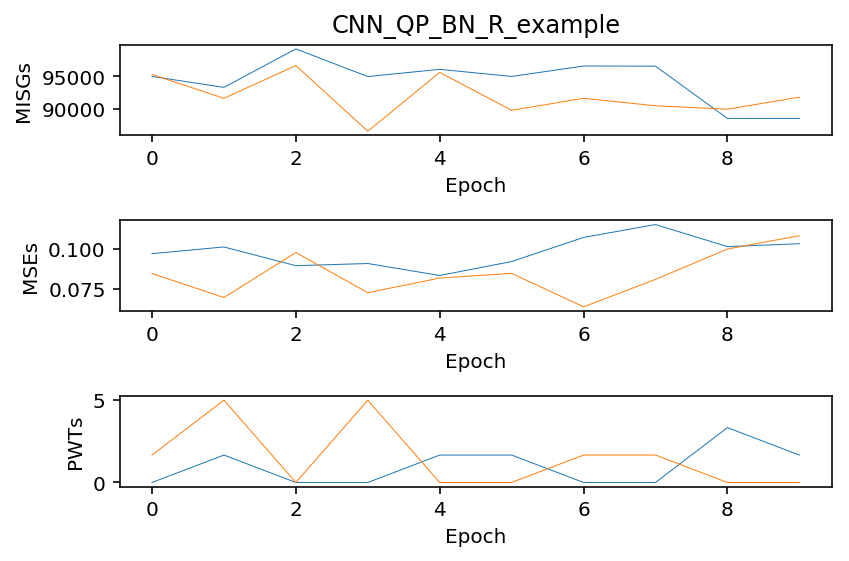

In [42]:
trainer.plot_metrics(figsize=(6,4))

***
## Reloading Parameters

 - Networks and Trainers are built from `Reloadable_Components`. Their parameters are saved and can be loaded from disk.
 - When a network is activated inside a trainer, the parameters (arguments) of the network and trainer objects are automatically saved in a `network_name/params/` directory
 
 > Note: This does not refer to the saving and loading of trained network models. See "Loading Trained Models" below

### Loading Networks params

Say we have done some training with the network `CNN_QP_BN_R_example`, but we want to see how changing the learning rate affects it. We could just input all the parameters again, but what if we are forgetful, or lazy? We load the saved parameters.

> Must provide a unique name for the new network. Depending on the arguments may have to provide None or empty lists.

In [22]:
CNN_QP_BN_R_example_2 = CNN_QP_BN_R('CNN_QP_BN_R_example_2', [],[],[])
CNN_QP_BN_R_example_2.print_params()

{'accuracy_threshold': 0.00625,
 'adam_initial_learning_rate': 0.0001,
 'cost': 'MSE',
 'gaussian_shift_scalar': 1e-05,
 'layer_downsampling_factors': [],
 'log_dir': 'logs/',
 'name': 'CNN_QP_BN_R_example_2',
 'num_1x1_conv_filters_per_layer': [],
 'num_freq_channels': 1024,
 'wide_convolution_filter_widths': []}


> Network ready to load parameters from disk. Must provide path to parameters. Parameters filename is the name of the class.

In [25]:
CNN_QP_BN_R_example_2.load_params('examples/CNN_QP_BN_R_example/params/CNN_QP_BN_R')
CNN_QP_BN_R_example_2.print_params()

params loaded{'accuracy_threshold': 0.00625,
 'adam_initial_learning_rate': 0.0001,
 'cost': 'MSE',
 'gaussian_shift_scalar': 1e-05,
 'layer_downsampling_factors': [1, 2, 4, 8],
 'log_dir': 'examples/',
 'name': 'CNN_QP_BN_R_example_2',
 'num_1x1_conv_filters_per_layer': [64, 32, 16, 8],
 'num_freq_channels': 1024,
 'wide_convolution_filter_widths': [32, 16, 8, 4]}


> Can change parameters after loading

In [26]:
CNN_QP_BN_R_example_2.adam_initial_learning_rate = 1e-05
CNN_QP_BN_R_example_2.print_params()

{'accuracy_threshold': 0.00625,
 'adam_initial_learning_rate': 1e-05,
 'cost': 'MSE',
 'gaussian_shift_scalar': 1e-05,
 'layer_downsampling_factors': [1, 2, 4, 8],
 'log_dir': 'examples/',
 'name': 'CNN_QP_BN_R_example_2',
 'num_1x1_conv_filters_per_layer': [64, 32, 16, 8],
 'num_freq_channels': 1024,
 'wide_convolution_filter_widths': [32, 16, 8, 4]}


### Loading trainer params

Same basic principle as loading network params

In [43]:
trainer_2 = CNN_R_Trainer(CNN_QP_BN_R_example_2,
                        Data_Creator)
trainer_2.print_params()

{'batch_size': 32,
 'conv_keep_prob': 0.9,
 'log_dir': 'logs/',
 'metric_names': ['MISGs', 'MSEs', 'PWTs'],
 'model_save_interval': 25,
 'name': 'CNN_QP_BN_R_example_2',
 'num_epochs': 100,
 'pred_keep_prob': 0.5,
 'pretrained_model_path': None,
 'sample_keep_prob': 0.8}


In [45]:
trainer_2.load_params('examples/CNN_QP_BN_R_example/params/CNN_R_Trainer')
trainer_2.print_params()

params loaded{'batch_size': 2,
 'conv_keep_prob': 0.9,
 'log_dir': 'examples/',
 'metric_names': ['MISGs', 'MSEs', 'PWTs'],
 'model_save_interval': 5,
 'name': 'CNN_QP_BN_R_example_2',
 'num_epochs': 10,
 'pred_keep_prob': 0.5,
 'pretrained_model_path': None,
 'sample_keep_prob': 0.8}


> Data needs to be added still. Does not have to be the same (change number of flatnesses for example)

In [46]:
trainer_2.add_data((training_baselines_data, training_redundant_baselines_dict),
                 (testing_baselines_data, testing_redundant_baselines_dict),
                 gains,
                 num_flatnesses = 1)

In [47]:
trainer_2.train()

saving metrics - saved

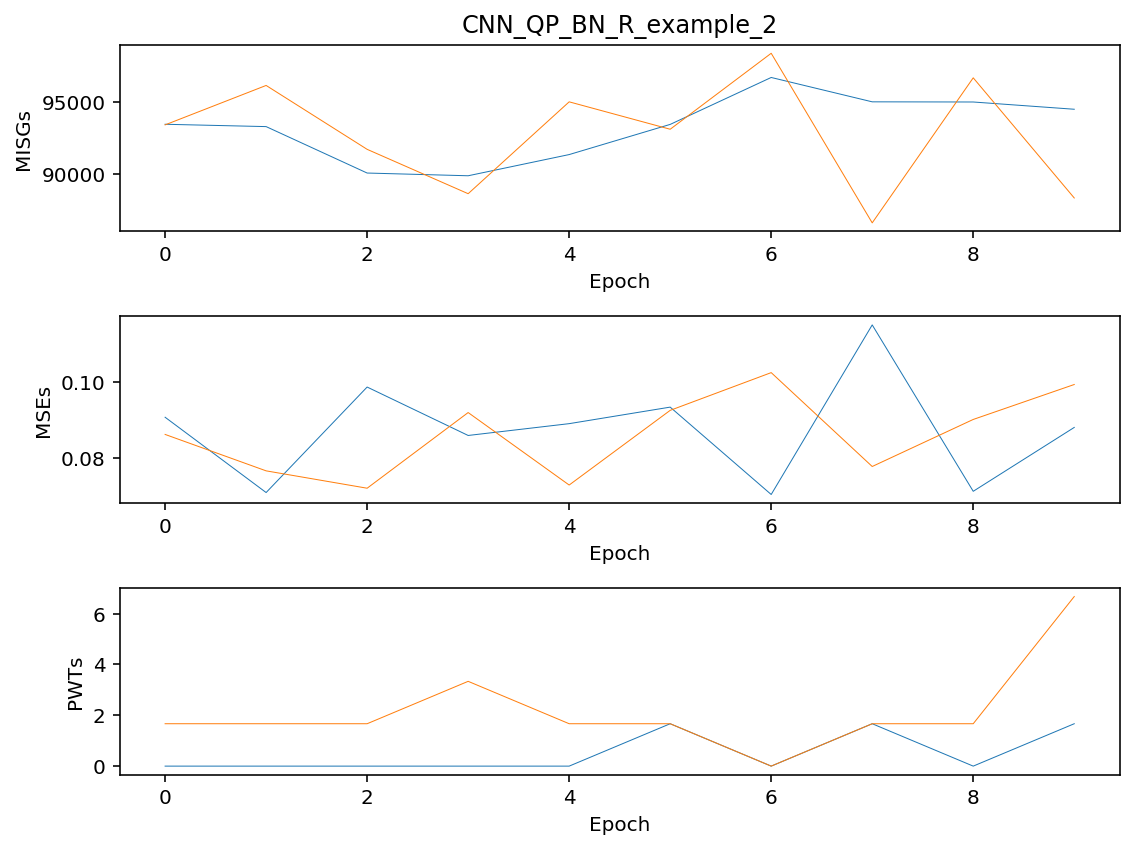

In [48]:
trainer_2.plot_metrics()

 To compare the different results its easiest to view them in tensorbaord:
 
    terminal : `tensorboard --logdir=log_dir` # will load all data in `log_dir`
    terminal : `tensorboard --logdir=log_dir/A:network_A, B:netowrk_B` # will load only networks A and B

Can also load the saved metrics from disk and manipulate them

In [55]:
def load_metrics(filename):
    """Loads up npzs. For dicts do loadnpz(fn)[()]"""
    
    a = np.load(filename)
    d = dict(zip(("data1{}".format(k) for k in a), (a[k] for k in a)))
    
    return d['data1arr_0'][()]

> Metrics are saved as dicts. Keys are metric name, values are lists of tuples. tuple[0] = training, tuple[1] = testing

In [56]:
CNN_QP_BN_R_example_metrics_dict = load_metrics('examples/CNN_QP_BN_R_example/metrics.npz')
CNN_QP_BN_R_example_PWTs = CNN_QP_BN_R_example_metrics_dict['PWTs']

In [59]:
CNN_QP_BN_R_example_2_metrics_dict = load_metrics('examples/CNN_QP_BN_R_example_2/metrics.npz')
CNN_QP_BN_R_example_2_PWTs = CNN_QP_BN_R_example_2_metrics_dict['PWTs']

In [75]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np

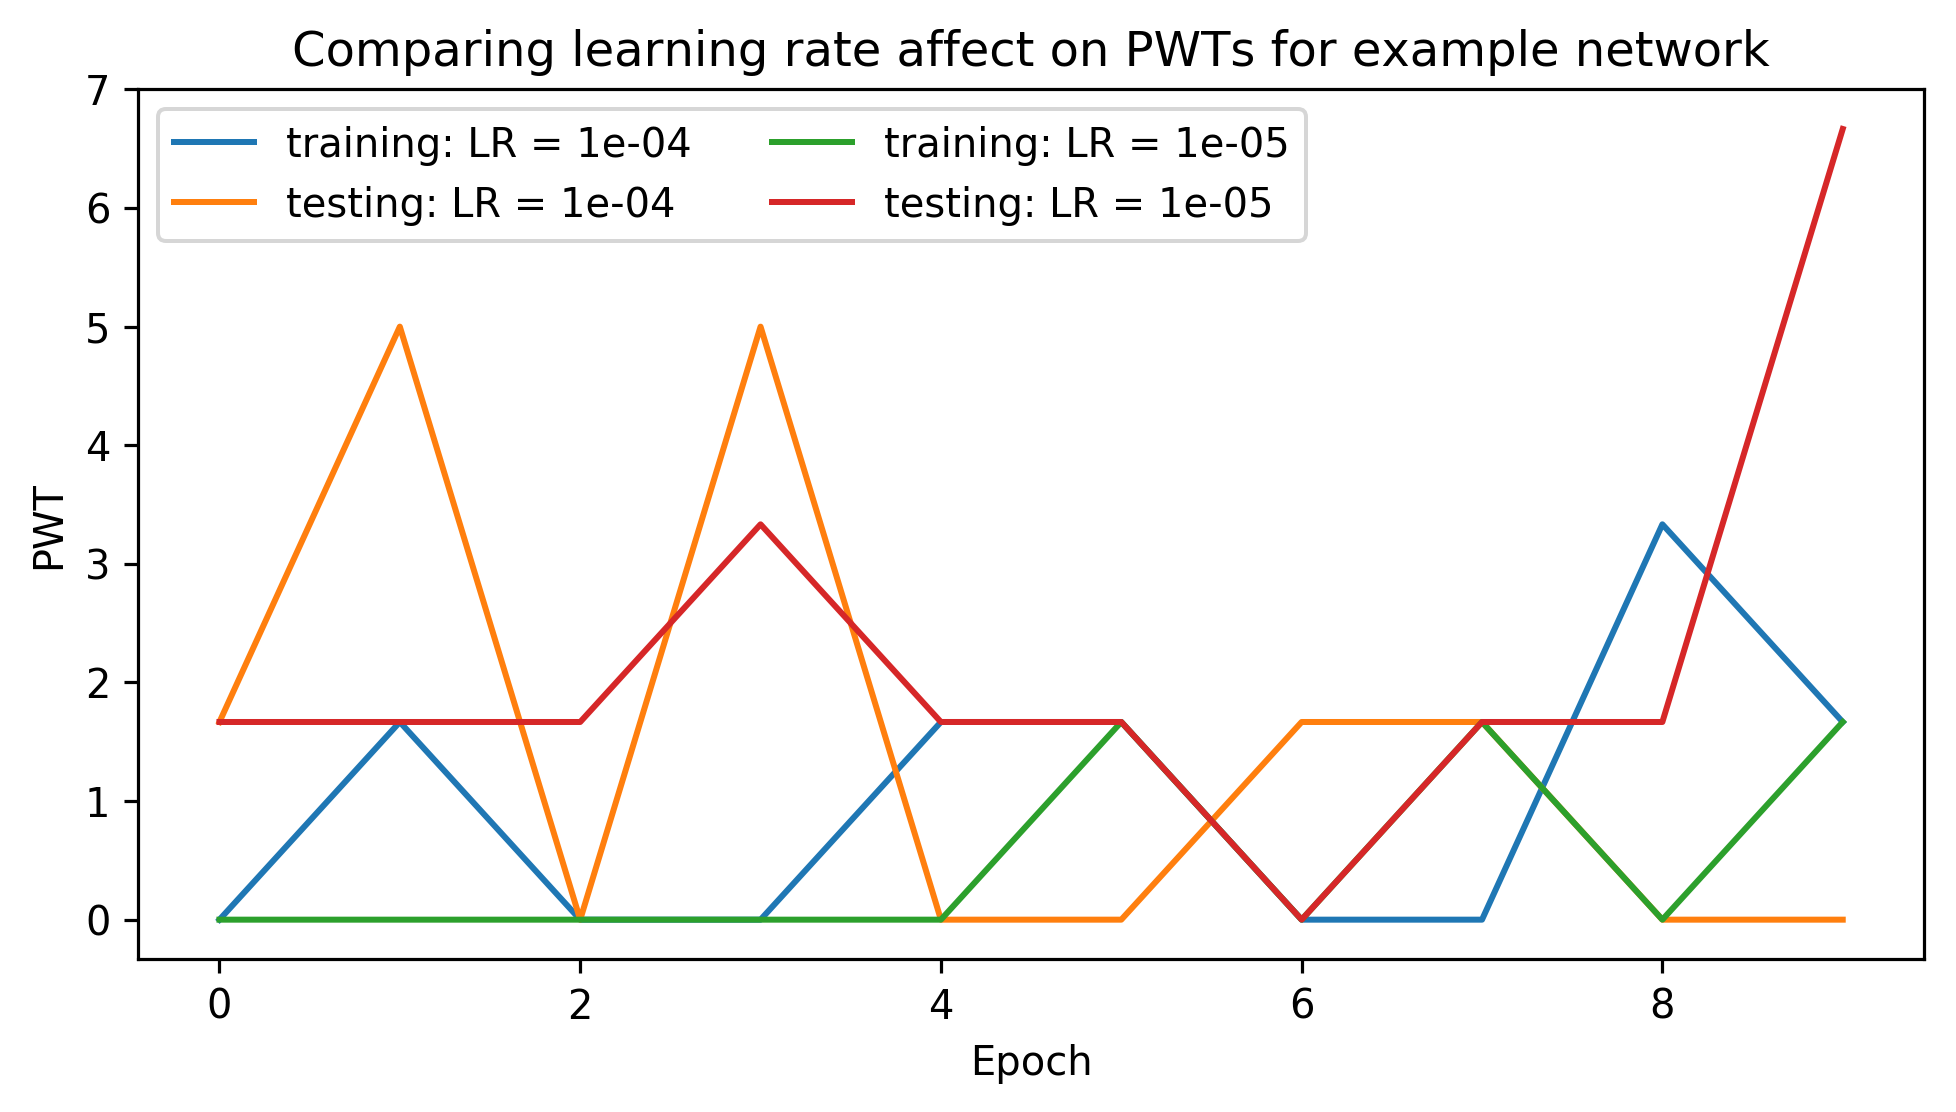

In [77]:
ex_training_PWTs = np.asarray(CNN_QP_BN_R_example_PWTs).T[0]
ex_testing_PWTs = np.asarray(CNN_QP_BN_R_example_PWTs).T[1]

ex_2_training_PWTs = np.asarray(CNN_QP_BN_R_example_2_PWTs).T[0]
ex_2_testing_PWTs = np.asarray(CNN_QP_BN_R_example_2_PWTs).T[1]

fig, ax = plt.subplots(figsize = (8,4), dpi = 144)

ax.plot(ex_training_PWTs, label = 'training: LR = 1e-04')
ax.plot(ex_testing_PWTs, label = 'testing: LR = 1e-04')
ax.plot(ex_2_training_PWTs, label = 'training: LR = 1e-05')
ax.plot(ex_2_testing_PWTs, label = 'testing: LR = 1e-05')

ax.legend(ncol = 2)

ax.set_title('Comparing learning rate affect on PWTs for example network')
ax.set_xlabel('Epoch')
ax.set_ylabel('PWT')

plt.show()

## Classifer Confusion Matrix Summaries

Classifers will now output a pair of confusion matrices for each epoch.
 - matrix rows are normalized and scaled to a range of 0 to 100.

 - Slightly different styles depending on number of classes
 
> A (very large) example confusion matrix for a classifer with 81 classes:

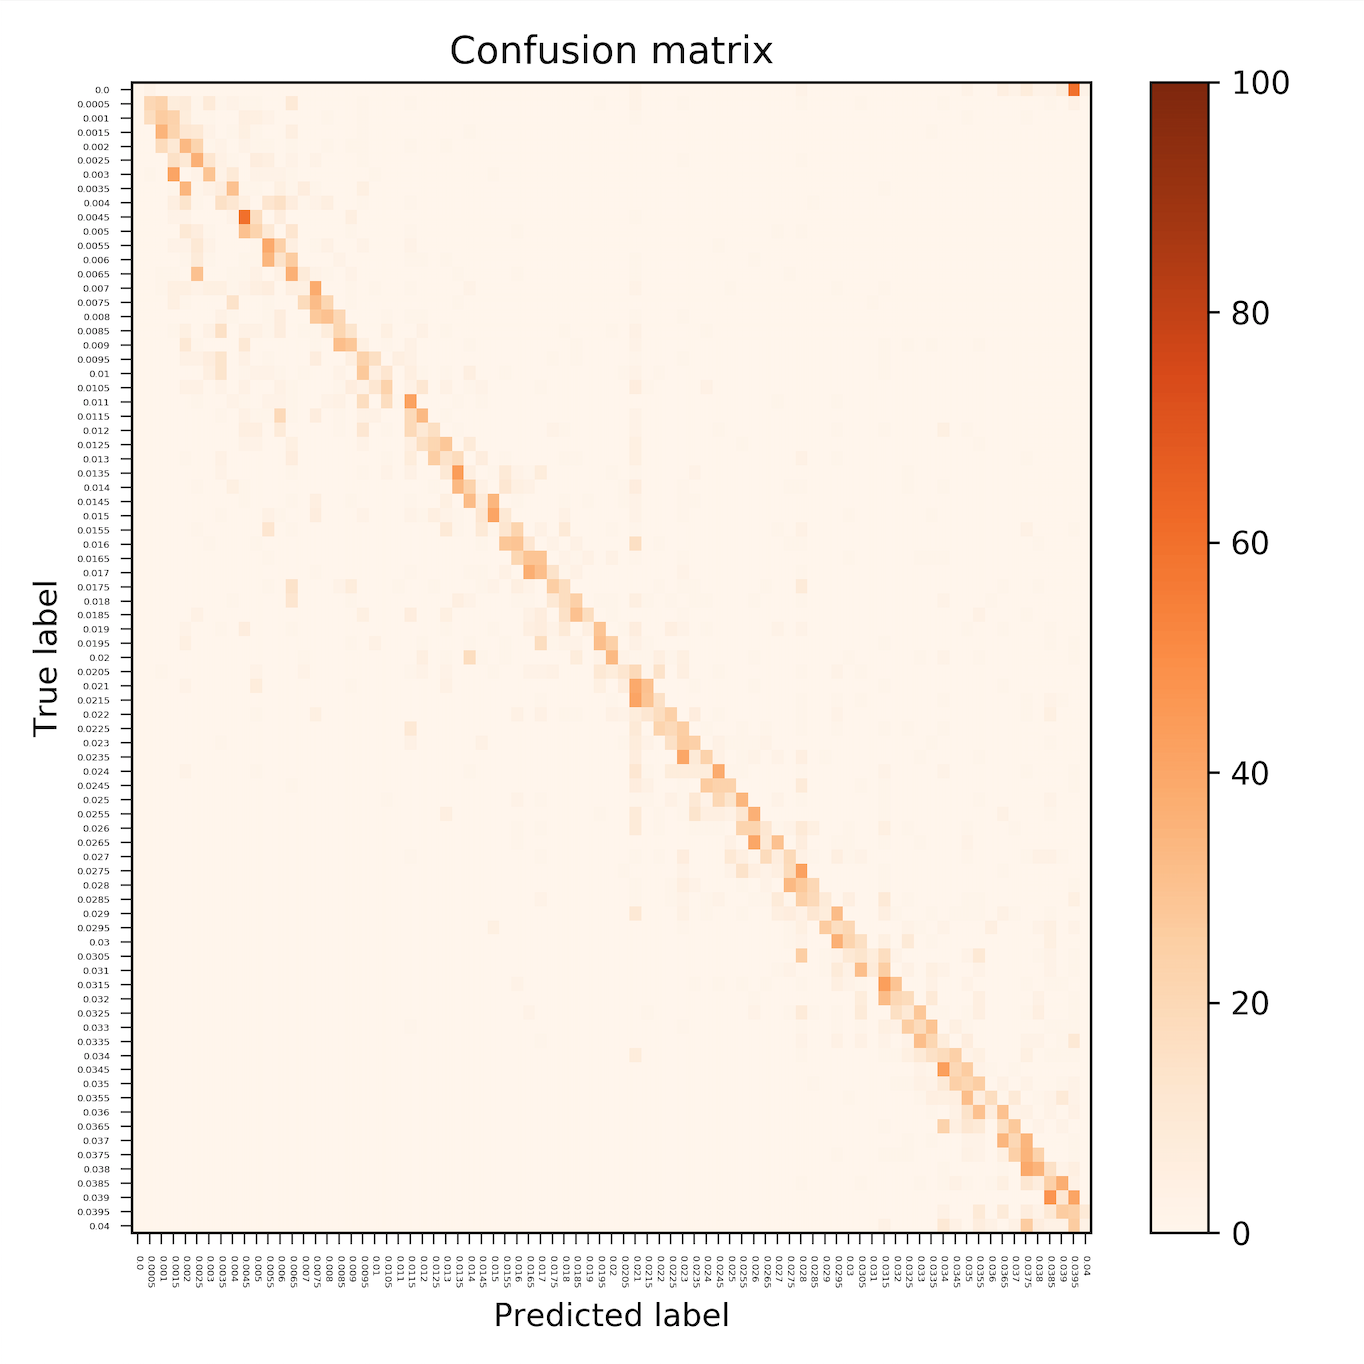

In [1]:
from IPython.display import Image, display
display(Image(filename='confusion_matrix_81_classes.png', embed=True))